# **Statement:**
In **25th March Afternoon** India has reported its **9 th death** with **562** Total confirmed cases due to **Covid-19**. Fresh cases from Manipur,Bihar,Madhya Pradesh and West Bengal has been reported by **Union ministry of Health and Family Welfare**.


# **GOAL:**
the main goal of this analysis is to predict the spread of the virus across different countries and regions.

# **TASKS:**
1.Analysing the present condition of India         
2.Finding similar or Different Trend           
3.Exploring a world wide Data          
4.Forcasting the world wide COVID-19 cases using prophet 

**Unzipping the datas set**

In [ ]:
import zipfile
with zipfile.ZipFile("/content/COVID 19 ML Model Data-20200425T132005Z-001.zip","r") as zip_ref:
    zip_ref.extractall()

**Importing all necessary Libraries**

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium import plugins
#taken care of warnings
import warnings
warnings.filterwarnings("ignore")

# ***Analysing Present Condition of India***

In [ ]:
df = pd.read_csv("/content/covid_19_india.csv")
df.rename(columns={"State/UnionTerritory": "Name of State / UT",'Confirmed':'Total_cases'},inplace=True)
df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational',"Date"],axis=1,inplace=True)
df=df.tail(37)[1:-1]
df.reset_index(drop=True,inplace=True)
df.head(5)

,Name of State / UT,Cured,Deaths,Total_cases
0,Andaman and Nicobar Islands,51,0,109
1,Andhra Pradesh,7313,198,16097
2,Arunachal Pradesh,66,1,195
3,Assam,6106,12,9013
4,Bihar,8020,77,10471


In [ ]:
#Total no of active cases = Total cases-(Total death+Total cured)
df["Total active cases"] = df["Total_cases"]-df["Cured"]-df["Deaths"]
total_active_case = df["Total active cases"].sum()
total_cured = df["Cured"].sum()
total_death = df["Deaths"].sum()
total_case = df["Total_cases"].sum()
print("Total no of cases across India till 24th June: ",total_case)
print("Total no of active cases across India till 4th July: ",total_active_case)
print("Total no of Cured cases across India till 4th July: ",total_cured)
print("Total no of Death cases across India till 4th July: ",total_death)

Total no of cases across India till 24th June:  619513
Total no of active cases across India till 4th July:  221408
Total no of Cured cases across India till 4th July:  379892
Total no of Death cases across India till 4th July:  18213


In [ ]:
#highlighting data frame to visualuze better
df.style.background_gradient(cmap="BuGn") 

,Name of State / UT,Cured,Deaths,Total_cases,Total active cases
0,Andaman and Nicobar Islands,51,0,109,58
1,Andhra Pradesh,7313,198,16097,8586
2,Arunachal Pradesh,66,1,195,128
3,Assam,6106,12,9013,2895
4,Bihar,8020,77,10471,2374
5,Chandigarh,389,6,450,55
6,Chhattisgarh,2385,14,3013,614
7,Dadra and Nagar Haveli and Daman and Diu,89,0,230,141
8,Delhi,63007,2864,92175,26304
9,Goa,734,4,1482,744


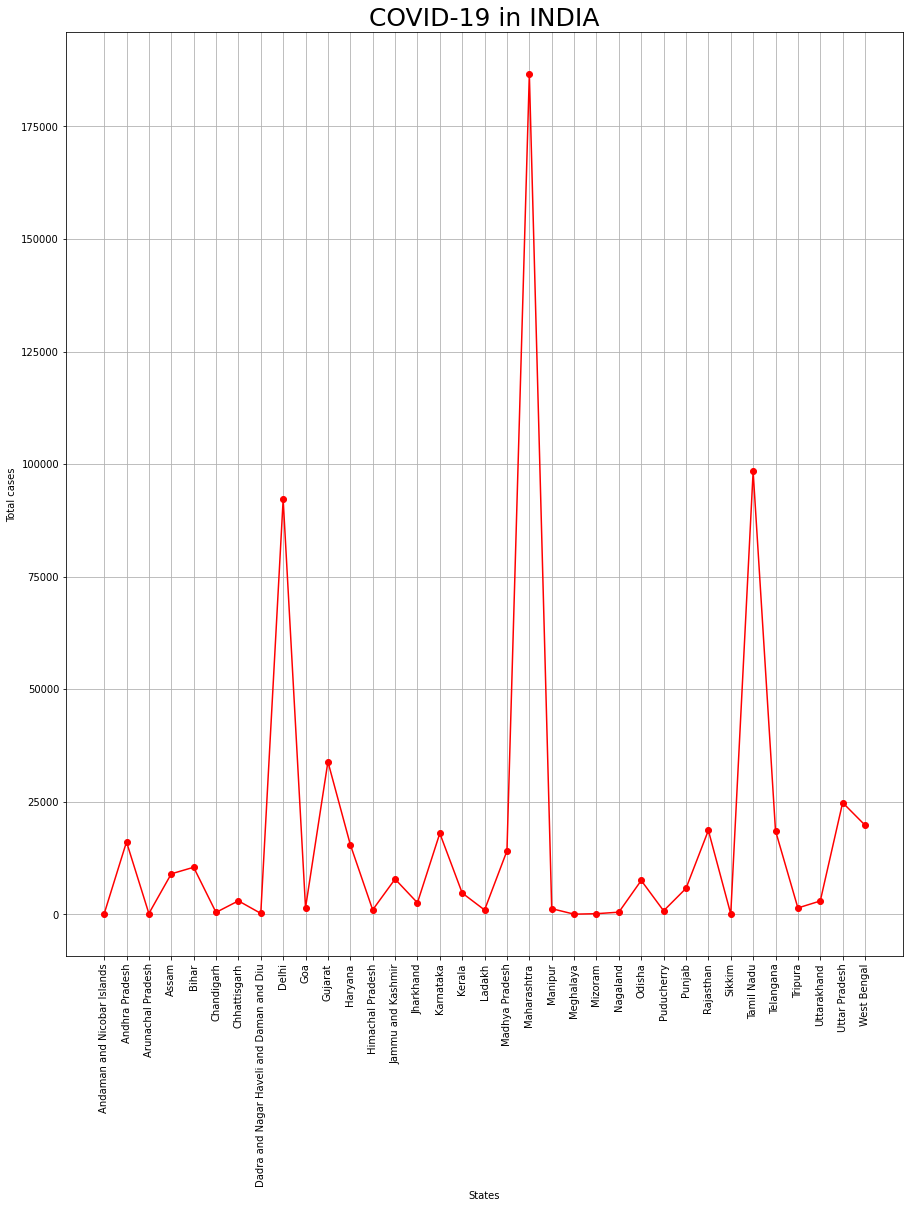

In [ ]:
plt.rcParams["figure.figsize"] = 15, 17
plt.plot(df["Name of State / UT"],df["Total_cases"],color = "red",marker="o")
plt.xlabel("States")
plt.ylabel("Total cases")
plt.title("COVID-19 in INDIA",fontsize=25)
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig("covid1.png")
plt.show()

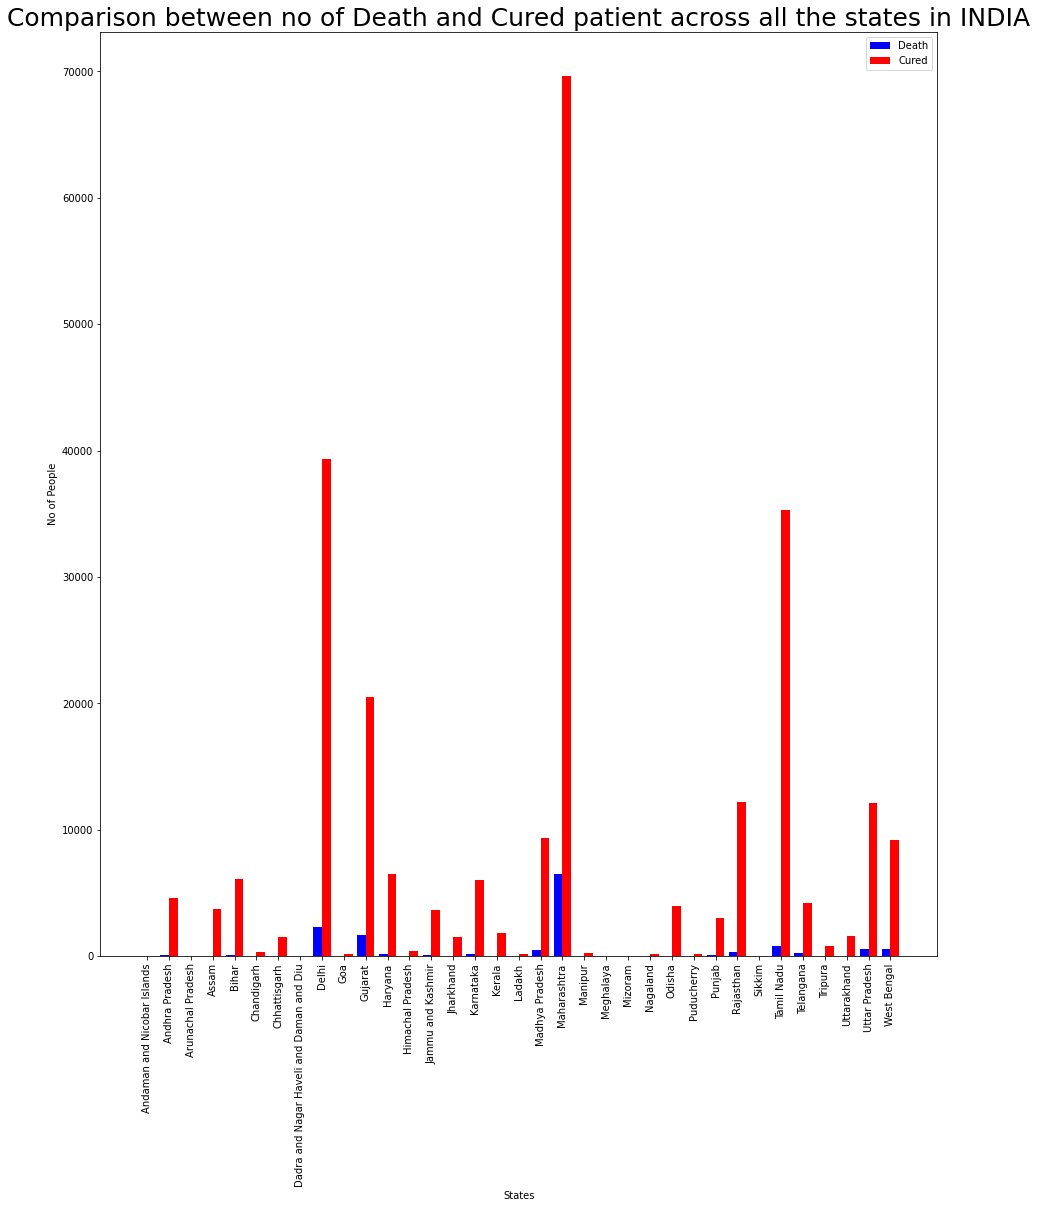

In [ ]:
fig, ax = plt.subplots()
labels=df["Name of State / UT"].to_list()
x = np.arange(len(labels))
width=0.4
rec1=ax.bar(x-(width/2),df["Deaths"].to_list(), width, color='b', align='center',label="Death")
rec2=ax.bar(x+(width/2), df["Cured"].to_list(), width, color='r', align='center',label="Cured")
ax.set_xlabel('States')
ax.set_ylabel('No of People')
ax.set_title("Comparison between no of Death and Cured patient across all the states in INDIA",fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()
plt.savefig("Covid3.png")
plt.show()

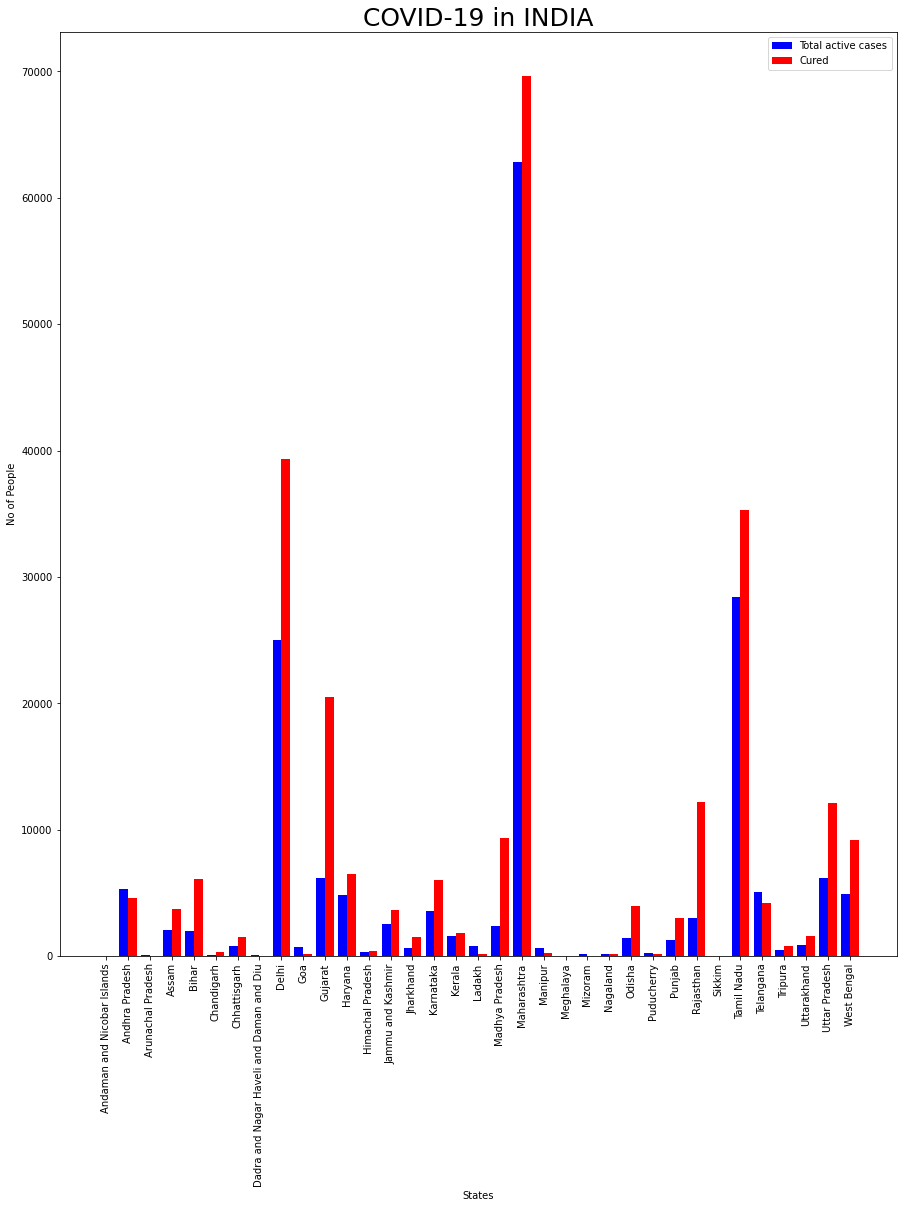

In [ ]:
fig, ax = plt.subplots()
labels=df["Name of State / UT"].to_list()
x = np.arange(len(labels))
width=0.4
rec1=ax.bar(x-(width/2),df["Total active cases"].to_list(), width, color='b', align='center',label="Total active cases")
rec2=ax.bar(x+(width/2), df["Cured"].to_list(), width, color='r', align='center',label="Cured")
ax.set_xlabel('States')
ax.set_ylabel('No of People')
ax.set_title("COVID-19 in INDIA",fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()
plt.savefig("Covid2.png")
plt.show()

# Total no of Active Cases

In [ ]:
total_cases = df.groupby("Name of State / UT")["Total active cases"].sum().sort_values(ascending=False).to_frame()
total_cases.style.background_gradient(cmap="GnBu")

,Total active cases
Name of State / UT,
Maharashtra,62848
Tamil Nadu,28431
Delhi,24988
Uttar Pradesh,6189
Gujarat,6148
Andhra Pradesh,5284
Telangana,5109
West Bengal,4930
Haryana,4844


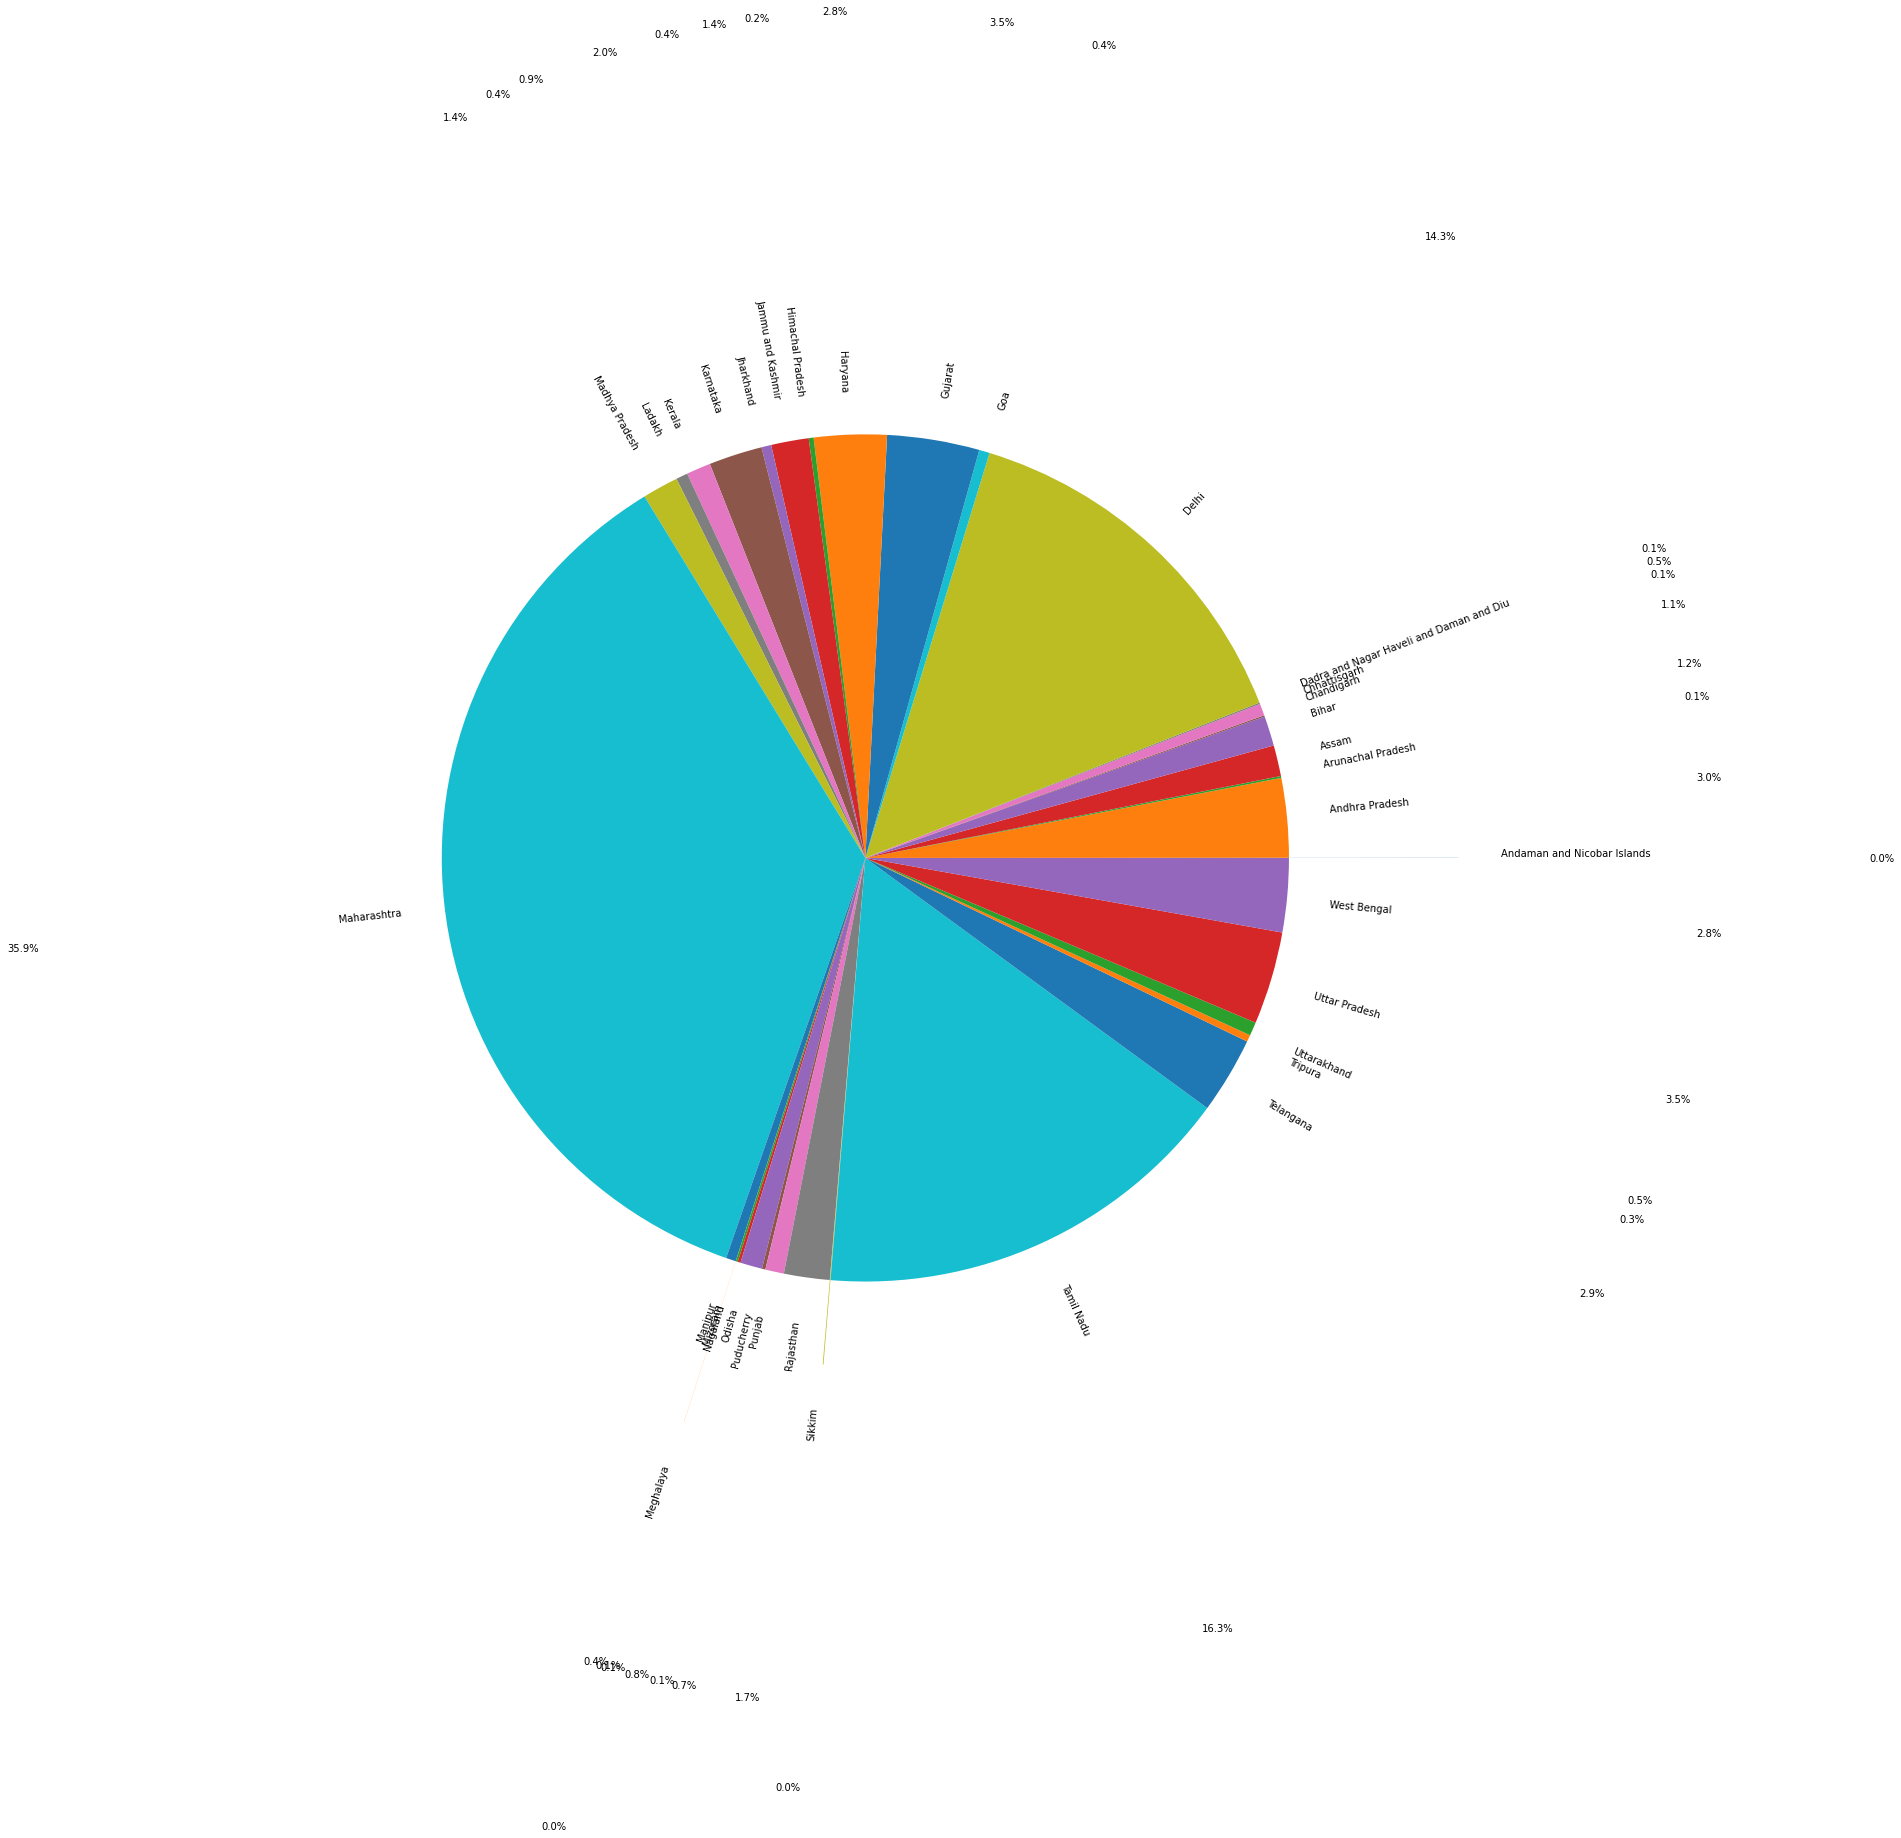

<Figure size 1800x1440 with 0 Axes>

In [ ]:
total_active = df["Total active cases"].to_list()
states = df["Name of State / UT"].to_list()
explode = []
for i in range(df.shape[0]):
    k=0.0
    if(df["Total active cases"][i] <90 and df["Total active cases"][i]>11):
        k=1.0
    elif(df["Total active cases"][i] <11 and df["Total active cases"][i]>4):
        k = 2.0
    elif(df["Total active cases"][i] <= 4):
        k=3.0
    explode.append(k)
plt.rcParams["figure.figsize"] = 25, 20
plt.pie(total_active,labels=states,autopct="%1.1f%%",radius=5,pctdistance=2,explode = explode,rotatelabels=40)
plt.axis("equal")
plt.show()
plt.savefig('plot.png')

# Visualize the Spread of the Covid-19 Geographically

In [ ]:
#coordinates of indian states and Union Territories
India_coordinates = pd.read_excel("/content/Indian Coordinates.xlsx")

In [ ]:
final_df = pd.merge(India_coordinates,df,on="Name of State / UT")
map = folium.Map(location=[10, 150], zoom_start=10, tiles="Stamenterrain")#Stamen Toner#Stamenterrain
for lat,lon,value,name in zip(final_df["Latitude"],final_df["Longitude"],final_df["Total active cases"],final_df["Name of State / UT"]):
    folium.CircleMarker([lat,lon],radius=int(math.sqrt(value))*0.3,popup = (str(name).capitalize())).add_to(map)
map


# **Comparison between Total case vs Cured patient**

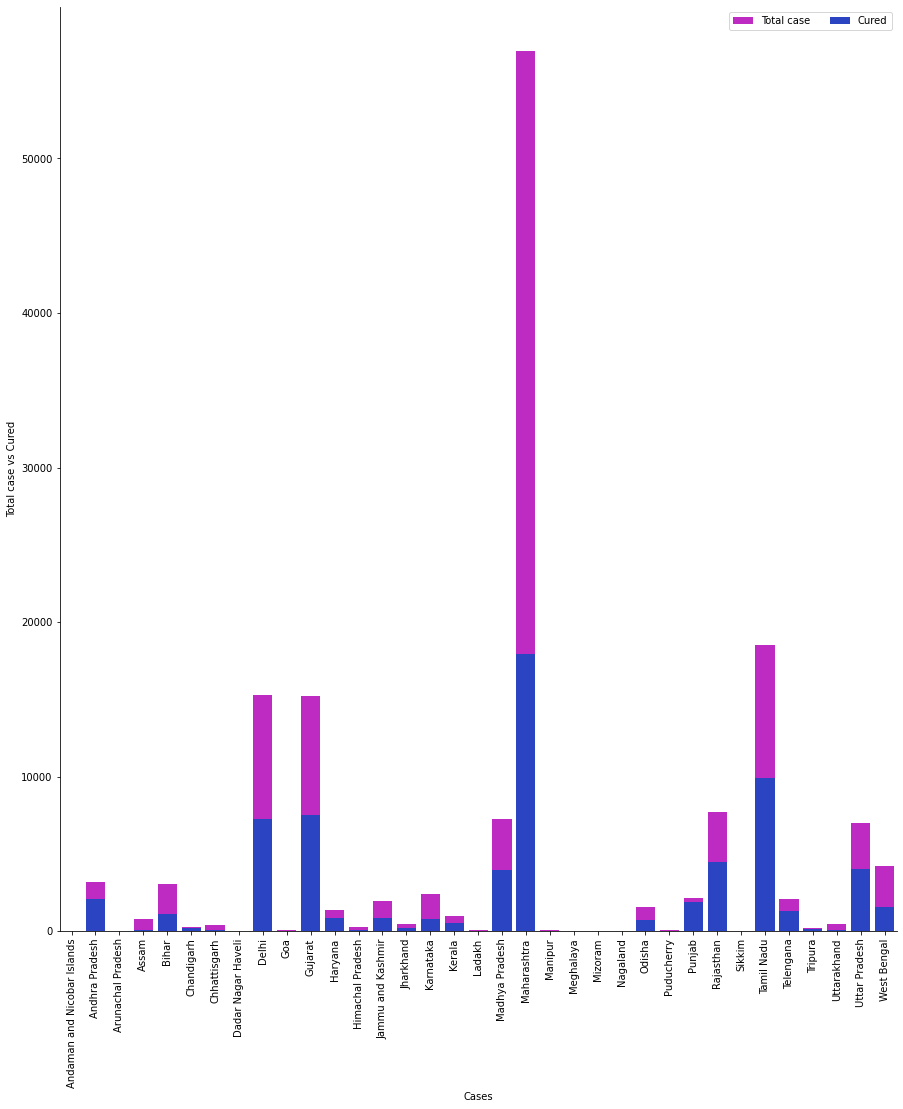

In [ ]:
f,ax=plt.subplots(figsize=(15,17))
data = df[["Name of State / UT","Total_cases","Cured",'Deaths']]

sns.set_color_codes('pastel')
sns.barplot(x="Name of State / UT",y="Total_cases",data=data,label='Total case',color='#d512db')

sns.set_color_codes('dark')
sns.barplot(x="Name of State / UT",y="Cured",data=data,label='Cured',color='#1233db')

ax.legend(ncol=2,loc='upper right',frameon=True)
ax.set(ylabel="Total case vs Cured",xlabel='Cases')
ax.set_xticklabels(data['Name of State / UT'].to_list(),rotation=90)
sns.despine()

# Corona Virus Trend Across the **Globe**

In [ ]:
#per day cases in India/Italy/Wuhan/Korea
India = pd.read_excel("/content/per_day_cases.xlsx", parse_dates = True, sheet_name="India")
Korea = pd.read_excel("/content/per_day_cases.xlsx", parse_dates = True, sheet_name="Korea")
Italy = pd.read_excel("/content/per_day_cases.xlsx", parse_dates = True, sheet_name="Italy")
Wuhan = pd.read_excel("/content/per_day_cases.xlsx", parse_dates = True, sheet_name="Wuhan")

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.0MB/s 


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

ModuleNotFoundError: ignored

In [ ]:
#interactive graphs
fig = go.Figure()
fig.add_trace(go.Scatter(x=India['Date'], y=India['Total Cases'],mode='lines+markers',name='Total cases'))
fig.update_layout(title_text='Total cumulative cases in India',plot_bgcolor='rgb(200,152,255)')
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(India,x="Date",y="New Cases",barmode='group',height=400)
fig.update_layout(title_text="Corona Virus in India on Daily basis",plot_bgcolor='rgb(200,152,255)')
fig.show()

# **India**

In [ ]:
fig = px.bar(India, x="Date", y='Total Cases', color='Total Cases', height=600, title="Corona virus total cases in India",color_discrete_sequence= px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(200,152,255)')
fig.show()

# **Italy**

In [ ]:
fig = px.bar(Italy, x="Date", y='Total Cases', color='Total Cases', height=600, title="Corona virus total cases in Italy",color_discrete_sequence= px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(200,152,255)')
fig.show()

# **South Korea**

In [ ]:
fig = px.bar(Korea, x="Date", y='Total Cases', color='Total Cases', height=600, title="Corona virus total cases in Korea",color_discrete_sequence= px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(200,152,255)')
fig.show()

# **China**

In [ ]:
fig = px.bar(Wuhan, x="Date", y='Total Cases', color='Total Cases', height=600, title="Corona virus total cases in Wuhan",color_discrete_sequence= px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(200,152,255)')
fig.show()

# Dynamic **Subplot**

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2,
                    specs=[[{}, {}],
                           [{'colspan': 2}, None]],
                    subplot_titles = ('S.Korea','Italy','India'))

fig.add_trace(go.Bar(x=Korea['Date'], y=Korea['Total Cases'],
                     marker=dict(color=Korea['Total Cases'], coloraxis='coloraxis')),1,1)
fig.add_trace(go.Bar(x=Italy['Date'], y=Italy['Total Cases'],
                     marker=dict(color=Italy['Total Cases'], coloraxis='coloraxis')),1,2)
fig.add_trace(go.Bar(x=India['Date'], y=India['Total Cases'],
                     marker=dict(color=India['Total Cases'], coloraxis='coloraxis')),2,1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title_text="Total confirmed cases(cumulative) comparison between India,Italy,South korea")

fig.update_layout(plot_bgcolor='rgb(200,152,255)')

fig.show()

# **Exploring World-wide Pandemic Spread Data**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df = df.drop(['Lat','Long_','Last_Update','UID','ISO3','People_Tested','People_Hospitalized'],axis=1)
df.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
0,Australia,8362.0,104.0,7355.0,903.0,32.844063,1.243722
1,Austria,18165.0,705.0,16607.0,853.0,201.689909,3.881090
2,Canada,106962.0,8722.0,70232.0,28009.0,282.551886,8.154298
3,China,84839.0,4641.0,79680.0,518.0,6.039754,5.470362
4,Denmark,13032.0,606.0,12017.0,409.0,224.992114,4.650092


In [ ]:
#ploting a bar plot inside a data frame and observe the trend of confirm cases.
df.copy().sort_values("Confirmed",ascending=False).reset_index(drop=True).head(10).style.bar(subset = (list(df.columns))[1:],align='left',color="#7e0ffc")

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
0,US,2795163.000000,129437.000000,790404.000000,1827101.000000,848.391215,4.630750
1,Brazil,1539081.000000,61884.000000,984615.000000,492582.000000,724.070982,4.020841
2,Russia,673564.000000,10011.000000,446127.000000,217426.000000,461.552398,1.486273
3,India,648315.000000,18655.000000,394227.000000,235433.000000,46.979199,2.877459
4,Peru,295599.000000,10226.000000,185852.000000,99521.000000,896.519412,3.459416
5,Chile,288089.000000,6051.000000,253343.000000,28695.000000,1507.040439,2.100393
6,United Kingdom,285788.000000,44216.000000,1375.000000,240197.000000,420.982210,15.471608
7,Spain,250545.000000,28385.000000,150376.000000,71785.000000,535.870309,11.329302
8,Mexico,245251.000000,29843.000000,189345.000000,26063.000000,191.913775,12.168350
9,Italy,241184.000000,34833.000000,191467.000000,14884.000000,398.902924,14.442500


In [ ]:
world = df[['Country_Region',"Confirmed","Deaths","Recovered"]].reset_index(drop=True)
world.head()

,Country_Region,Confirmed,Deaths,Recovered
0,Australia,8362.0,104.0,7355.0
1,Austria,18165.0,705.0,16607.0
2,Canada,106962.0,8722.0,70232.0
3,China,84839.0,4641.0,79680.0
4,Denmark,13032.0,606.0,12017.0


In [ ]:
world["active"] = world["Confirmed"] - world["Deaths"] - world["Recovered"]
max = int(world["active"].max())
#min = world["active"].min()

In [ ]:
figure = px.choropleth(world,
                       locations="Country_Region",
                       locationmode="country names",
                       color="active",
                       hover_name="Country_Region",
                       range_color=[0,max],
                       color_continuous_scale="emrld",
                       title="Countries with Active Cases")
figure.show()

 ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd']

## **Time series data**(Confirmed,Death,Recovered)--***Globe***

In [ ]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")



In [ ]:
df_confirmed = df_confirmed.drop(['Province/State','Lat','Long'],axis=1)
df_death = df_death.drop(['Province/State','Lat','Long'],axis=1)
df_recovered = df_recovered.drop(['Province/State','Lat','Long'],axis=1)

In [ ]:
print(df_confirmed.shape)
print(df_death.shape)
print(df_recovered.shape)

(266, 169)
(266, 169)
(253, 169)


## **Indian Data for Covid-19**

In [ ]:
list1 = list(df_confirmed.columns)[1:]#list of dates
confirmed = []
death = []
recovered = []
for i in range(len(list1)):
    confirmed.append(df_confirmed[df_confirmed['Country/Region']=="India"][list1[i]].iloc[0])
    death.append(df_death[df_death['Country/Region']=="India"][list1[i]].iloc[0])
    recovered.append(df_recovered[df_recovered['Country/Region']=="India"][list1[i]].iloc[0])

df2 = pd.DataFrame(list(zip(confirmed,death,recovered,list1)), 
               columns =['Confirmed','Deaths','Recovered','Date']) 


In [ ]:
df2.tail(5)

,Confirmed,Deaths,Recovered,Date
163,648315,18655,394227,7/3/20
164,673165,19268,409083,7/4/20
165,697413,19693,424433,7/5/20
166,719664,20159,439934,7/6/20
167,742417,20642,456831,7/7/20


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df2["Date"], y=df2["Confirmed"], mode='lines+markers',name='Confirmed cases of India',line=dict(color= 'Red')))
fig.add_trace(go.Scatter(x = df2["Date"], y=df2["Deaths"], mode='lines+markers',name='Death cases of India',line=dict(color= 'Blue')))
fig.add_trace(go.Scatter(x = df2["Date"], y=df2["Recovered"], mode='lines+markers',name='Recovery cases of India',line=dict(color= 'Green')))

fig.update_layout(plot_bgcolor='rgb(200,152,255)',title_text="Total case study of India(Covid-19)")

fig.show()

### **World Wide Data Analysis(Confirmed cases,Death Cases and Recovery Ceses)**

In [ ]:
confirmed = pd.DataFrame(df_confirmed.drop('Country/Region',axis=1).sum(axis = 0, skipna = True),columns=['Confirmed'])
dead = pd.DataFrame(df_death.drop('Country/Region',axis=1).sum(axis = 0, skipna = True),columns=['Deaths'])
rec = pd.DataFrame(df_recovered.drop('Country/Region',axis=1).sum(axis = 0, skipna = True),columns=['Recovered'])
date = pd.DataFrame(list(df_confirmed.columns)[1:],columns=['Date'])#list of dates

confirmed.index = range(df_confirmed.shape[1]-1)
dead.index = range(df_death.shape[1]-1)
rec.index = range(df_recovered.shape[1]-1)

world = pd.concat([date,confirmed,dead,rec],axis=1)
world.head()


,Date,Confirmed,Deaths,Recovered
0,1/22/20,555,17,28
1,1/23/20,654,18,30
2,1/24/20,941,26,36
3,1/25/20,1434,42,39
4,1/26/20,2118,56,52


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = world["Date"], y=world["Confirmed"], mode='lines+markers',name='Confirmed cases of tha World',line=dict(color= 'Red')))
fig.add_trace(go.Scatter(x = world["Date"], y=world["Deaths"], mode='lines+markers',name='Death cases of tha World',line=dict(color= 'Blue')))
fig.add_trace(go.Scatter(x = world["Date"], y=world["Recovered"], mode='lines+markers',name='Recovery cases of the World',line=dict(color= 'Green')))

fig.update_layout(plot_bgcolor='rgb(200,152,255)',title_text="Total case study of The World(Covid-19)")

fig.show()

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

from pathlib import Path
gifPath = Path("/content/Covid.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git
!pip install shapely

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-ub6wzl67
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-ub6wzl67
     |████████████████████████████████| 14.7MB 208kB/s 
     |████████████████████████████████| 10.9MB 38.4MB/s 
  Created wheel for geopandas: filename=geopandas-0.8.0+5.g89908f8-py2.py3-none-any.whl size=963135 sha256=e112658b3636ddca77576583cba7ea8bd0f415b45ea45c53820c8a8b27fa48fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-904jpf__/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime



[Projection on Map](https://matplotlib.org/basemap/users/mapsetup.html)        
[Instruction for plotting a link](https://www.datadependence.com/2016/06/creating-map-visualisations-in-python/)   
[Map Projection](https://boundingbox.klokantech.com/)  
[Bounding Box selection](https://boundingbox.klokantech.com/)

In [ ]:
import zipfile
with zipfile.ZipFile("/content/India_SHP.zip","r") as zip_ref:
    zip_ref.extractall()

In [ ]:
fp = "/content/INDIA.shp"
map_df = gpd.read_file(fp)
map_df.head()

,ST_NAME,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12..."
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431..."
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624..."
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952..."
4,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646..."


In [ ]:
data_state = pd.read_csv("https://raw.githubusercontent.com/kalyaniuniversity/COVID-19-Datasets/master/India%20Statewise%20Confirmed%20Cases/COVID19_INDIA_STATEWISE_TIME_SERIES_CONFIRMED.csv")
data_state = data_state.drop(['CODE','LATITUDE','LONGITUDE','PER CAPITA INCOME (INR)','POPULATION','AVERAGE TEMPERATURE (°C)'], axis=1)
data_state = data_state.drop([37]).reset_index(drop=True)
data_state = data_state.drop([18]).reset_index(drop=True)
data_state = data_state.drop([31]).reset_index(drop=True)



```
x = data_state['STATE/UT'].to_list()
for i in range(len(x)):
    flag = 0
    for map_state in map_df['ST_NAME'].to_list():
        if x[i] == map_state:
            flag=1
            break
        else:
            flag=0
    if flag==0:
        print(i,x[i])
```



In [ ]:

# changing the data_state "Sate column " according to map dataframe
data_state['STATE/UT'].iloc[0] = 'ANDAMAN AND NICOBAR ISLANDS'
data_state['STATE/UT'].iloc[5] = 'CHANDIGARH'
data_state['STATE/UT'].iloc[7] = 'DADRA AND NAGAR HAVELI'
data_state['STATE/UT'].iloc[8] = 'DAMAN AND DIU'
data_state['STATE/UT'].iloc[9] = 'Nct Of Delhi'
data_state['STATE/UT'].iloc[14] = 'Jammu And Kashmir'
data_state['STATE/UT'].iloc[18] = 'LAKSHADWEEP'
data_state['STATE/UT'].iloc[25] = 'Orissa'
data_state['STATE/UT'].iloc[26] = 'Pondicherry'



In [ ]:
data_state.shape

(36, 156)

In [ ]:
final_state_data = map_df.set_index('ST_NAME').join(data_state.set_index('STATE/UT'))
print(final_state_data.shape)
final_state_data.head(5)

(35, 156)


,geometry,1/30/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,...,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/1/2020,7/2/2020,7/3/2020
ST_NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,35,38,38,38,40,41,44,44,45,47,47,48,48,50,56,58,72,72,83,90,97,100,109,116
Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2886,2983,3117,3245,3330,3461,3571,3676,3791,3971,4112,4253,4460,4659,4813,5029,5247,5429,5636,5858,6152,6456,6720,7071,7496,7961,8452,8929,9372,9834,10331,10884,11489,12285,13098,13891,14595,15252,16097,16934
Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,3,3,4,4,20,28,37,42,47,48,50,57,57,61,67,80,91,94,98,102,106,106,138,138,139,148,158,160,172,174,177,182,187,191,195,232,252
Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,549,683,784,881,1058,1217,1340,1486,1562,1831,2116,2401,2474,2682,2836,3051,3286,3431,3694,3901,4119,4310,4511,4695,4904,4904,5153,5484,5751,5954,6181,6545,6818,7064,7391,7693,8306,8854,9333,9698
Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2737,2968,3036,3185,3359,3565,3807,3945,4096,4326,4452,4578,4831,5070,5247,5455,5698,5948,6096,6289,6475,6662,6810,6940,7040,7290,7503,7665,7893,8050,8273,8488,8678,8980,9224,9618,9988,10204,10682,11111


**The below code is for creating Gif**



```
r=1
if r>r-1:
    r = r+1
print(r)

for column in list(final_state_data.columns)[r:r+1]:
    datetime_object=datetime.strptime(column, '%m/%d/%Y')
    print(datetime_object.strftime("%d")+" "+datetime_object.strftime("%b"))
    fig,ax=plt.subplots(1,figsize=(10,6))
    ax.axis("off")
    ax.set_title(f'State wise Covid-19 Cases across India \n{datetime_object.strftime("%d")+" "+datetime_object.strftime("%b")}', fontdict={'fontsize':'25', 'fontweight':'3'})

    final_state_data.plot(column=column ,cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    fig.savefig(f"/content/drive/My Drive/Covid -Gif/{r}.png",dpi=100)
    plt.show()

# Generate GIF
import imageio
from pathlib import Path

picsPath = Path("/content/drive/My Drive/Covid -Gif")
images = []
for f in picsPath.glob("*.png"):
    images.append(imageio.imread(f))
imageio.mimsave('Covid.gif', images)
```



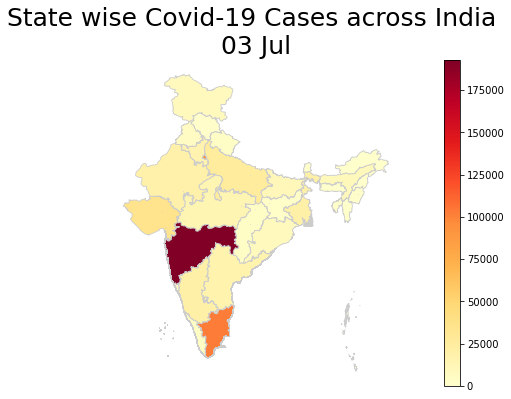

In [ ]:
datetime_object=datetime.strptime('7/3/2020', '%m/%d/%Y')
fig,ax=plt.subplots(1,figsize=(15,6))
ax.axis("off")
ax.set_title(f'State wise Covid-19 Cases across India \n{datetime_object.strftime("%d")+" "+datetime_object.strftime("%b")}', fontdict={'fontsize':'25', 'fontweight':'3'})

final_state_data.plot(column='7/3/2020' ,cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.savefig("India.png")
plt.show()

# ***Predective Model(SEIR)***

In [ ]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta,datetime

In [ ]:
START_DATE={
    "Italy":"1/31/20",
    "India":"1/30/20"
}

class Learner(object):
    
    def __init__(self, country, loss, start_date="1/22/20", predict_range=150, s_o=100000, i_o=2, r_o=10):
        self.country=country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_o = s_o
        self.i_o = i_o
        self.r_o = r_o
    
    def load_confirmed(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        df = df.drop(["Province/State"],axis=1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def load_recovered(self, country):
        df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
        df = df.drop(["Province/State"],axis=1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def load_dead(self, country):
        df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
        df = df.drop(["Province/State"],axis=1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def extend_index(self, index, new_size):
        values=index.values
        current=datetime.strptime(index[-1], "%m/%d/%y")
        while len(values)<new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return(values)
    
    def predict(self, beta, gama, data, recovered, death, country, s_o, i_o, r_o):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t,y):
            S=y[0]
            I=y[1]
            R=y[2]
            return [-beta*S*I, beta*S*I-gama*I, gama*I]
        extended_actual = np.concatenate((data.values, [None]*(size-len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None]*(size-len(recovered.values))))
        extended_death = np.concatenate((death.values, [None]*(size-len(death.values))))
        return new_index, extended_actual,extended_recovered, extended_death,solve_ivp(SIR, [0,size], [s_o,i_o,r_o],t_eval=np.arange(0,size,1))
    
    def train(self):
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country)-recovered-death)

        optimal = minimize(
            loss,
            [0.001,0.001],
            args=(data,recovered,self.s_o,self.i_o,self.r_o),
            method = "L-BFGS-B",
            bounds=[(0.0000001,0.4), (0.0000001,0.4)]
        )
        print(optimal)
        beta, gama = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction=self.predict(beta,gama,data,recovered,death,self.country,self.s_o,self.i_o,self.r_o)
        df = pd.DataFrame({"Infected_data":extended_actual,"Recovered_data":extended_recovered,"Death":
                           extended_death,"Suseptible":prediction.y[0],'Infected':prediction.y[1],'Recovered':prediction.y[2]}, index=new_index)
        
        df.to_csv(f"{self.country}.csv")
        fig, ax=plt.subplots(figsize=(15,10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta={beta:.8f}, gamma={gama:.8f}, r_o={beta/gama:.8f}")
        fig.savefig(f"{self.country}.png")

        return df, fig




In [ ]:
def loss(point,data,recovered, s_o,i_o,r_o):
    size = len(data)
    beta, gama=point
    def SIR(t,y):
        S=y[0]
        I=y[1]
        R=y[2]
        return [-beta*S*I, beta*S*I-gama*I, gama*I]
    solution=solve_ivp(SIR, [0,size], [s_o,i_o,r_o],t_eval=np.arange(0,size,1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1]-data)**2))
    l2 = np.sqrt(np.mean((solution.y[2]-recovered)**2))

    alpha=0.1
    return alpha*l1+(1-alpha)*l2


**For Italy**

In [ ]:
Italy = Learner(country="Italy",loss=loss)
Italy_df, Italy_fig = Italy.train()

KeyboardInterrupt: ignored

### ***For India***

In [ ]:
India = Learner(country="India", loss=loss, start_date="1/30/20",i_o=3)
India_df, India_fig = India.train()

## **Time Series Analysis Using Facebook Prophet**

In [ ]:
world.head()

,Date,Confirmed,Deaths,Recovered
0,1/22/20,555,17,28
1,1/23/20,654,18,30
2,1/24/20,941,26,36
3,1/25/20,1434,42,39
4,1/26/20,2118,56,52


In [ ]:
df2.head()

,Confirmed,Deaths,Recovered,Date
0,0,0,0,1/22/20
1,0,0,0,1/23/20
2,0,0,0,1/24/20
3,0,0,0,1/25/20
4,0,0,0,1/26/20


In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = world[["Date","Confirmed"]]
death = world[["Date","Deaths"]]
recovered = world[["Date","Recovered"]]
confirmed.columns = ["ds","y"]
confirmed["ds"] = pd.to_datetime(confirmed["ds"])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
170,2020-07-10
171,2020-07-11
172,2020-07-12
173,2020-07-13
174,2020-07-14


In [ ]:
forecast = m.predict(future)
df20 = forecast[["ds","yhat"]].iloc[-14:-7]
#

In [ ]:
df = confirmed.tail(7)

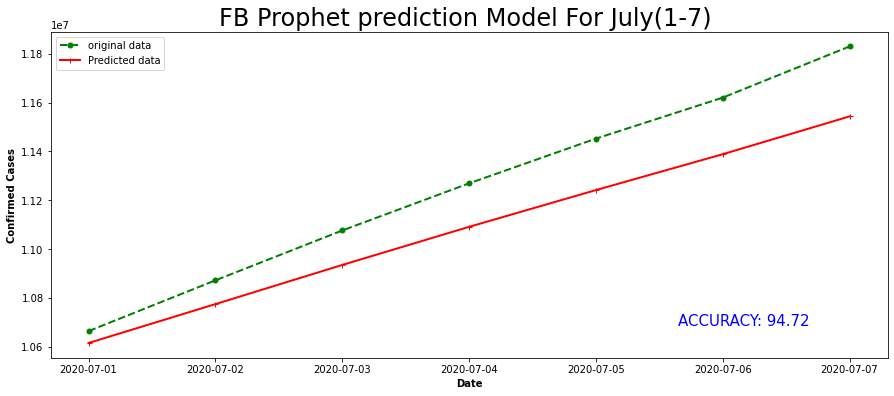

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.plot(df["ds"],df["y"],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
ax.plot(df20["ds"],df20["yhat"],color='red', marker='+', linestyle='solid',linewidth=2, markersize=5)
ax.legend(['original data',"Predicted data"])
ax.text(0.75, 0.10, 'ACCURACY: 94.72', fontsize=15,transform=ax.transAxes,color="blue")
ax.set_xlabel('Date',  
               fontweight ='bold')
ax.set_ylabel('Confirmed Cases',  
               fontweight ='bold')
ax.set_title("FB Prophet prediction Model For July(1-7) ",fontdict={"fontsize":24},loc="center")
plt.show()

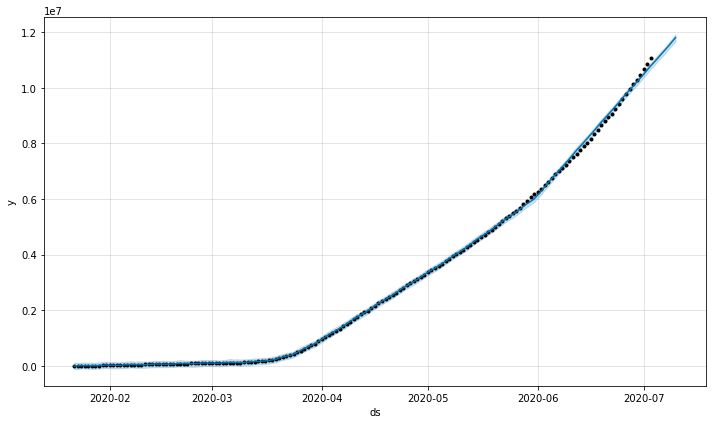

In [ ]:
cm = m.plot(forecast)

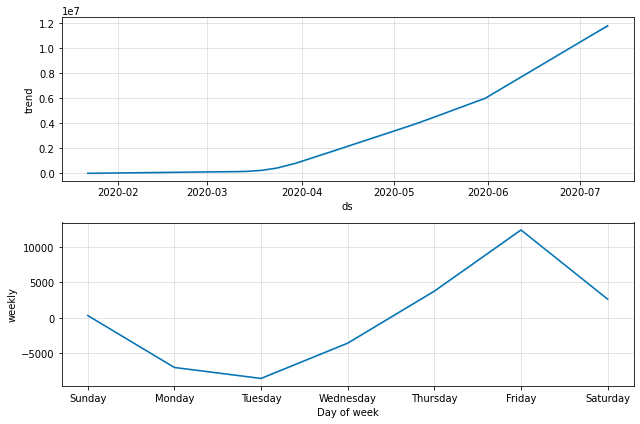

In [ ]:
x = m.plot_components(forecast)

In [ ]:
confirmed = df2[["Date","Confirmed"]]
death = df2[["Date","Deaths"]]
recovered = df2[["Date","Recovered"]]
confirmed.columns = ["ds","y"]
confirmed["ds"] = pd.to_datetime(confirmed["ds"])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
170,2020-07-10
171,2020-07-11
172,2020-07-12
173,2020-07-13
174,2020-07-14


In [ ]:
forecast = m.predict(future)
df20 = forecast[["ds","yhat"]].iloc[-14:-7]

In [ ]:
df = confirmed.tail(7)

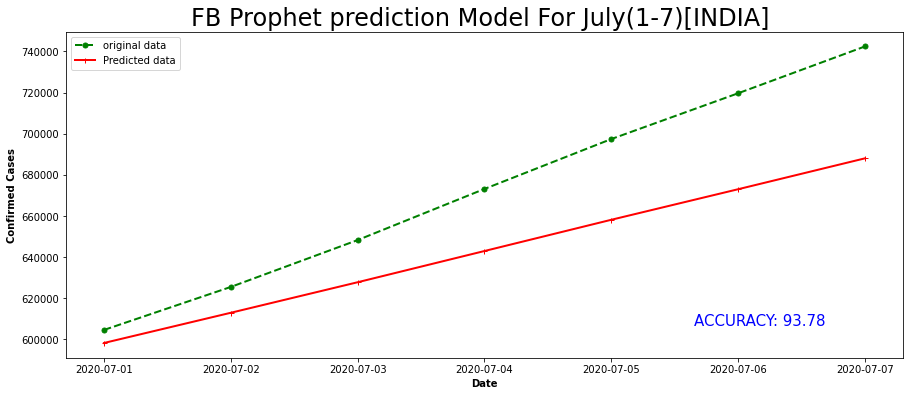

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.plot(df["ds"],df["y"],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
ax.plot(df20["ds"],df20["yhat"],color='red', marker='+', linestyle='solid',linewidth=2, markersize=5)
ax.legend(['original data',"Predicted data"])
ax.text(0.75, 0.10, 'ACCURACY: 93.78', fontsize=15,transform=ax.transAxes,color="blue")
ax.set_xlabel('Date',  
               fontweight ='bold')
ax.set_ylabel('Confirmed Cases',  
               fontweight ='bold')
ax.set_title("FB Prophet prediction Model For July(1-7)[INDIA] ",fontdict={"fontsize":24},loc="center")
plt.show()
#print("The Model Accuracy:", (100-np.sqrt(((df20["yhat"].values-df["y"].values)**2/df["y"].values.sum()).sum()/n_samples)))

In [ ]:
n_samples = 45

In [ ]:
print("The Model Accuracy:", (100-np.sqrt(((df20["yhat"].values-df["y"].values)**2/df["y"].values.sum()).sum()/n_samples)))

The Model Accuracy: 93.78119891243662


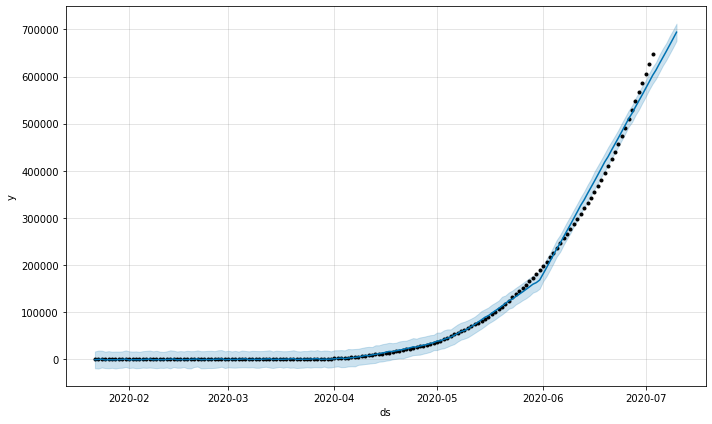

In [ ]:
cm = m.plot(forecast)

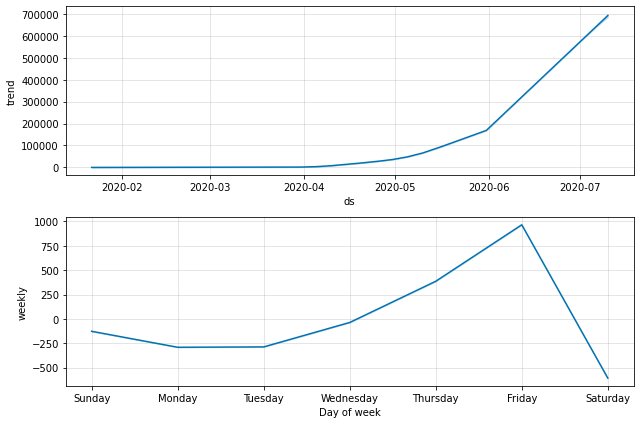

In [ ]:
x = m.plot_components(forecast)

# **Linear Regression and SVM Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime

In [ ]:
confirmed = world[["Date","Confirmed"]]
confirmed["Date"] = pd.to_datetime(confirmed["Date"])
confirmed["Date"] = confirmed["Date"].map(datetime.datetime.toordinal)

In [ ]:
x = confirmed["Date"]
y = confirmed["Confirmed"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [ ]:
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(np.array(x_test).reshape(-1,1))

In [ ]:
mean_squared_error(y_test,y_pred)

1153186629133.8423

In [ ]:
y_test = np.array(y_test)

In [ ]:
y_pred = y_pred.reshape(y_pred.shape[0])

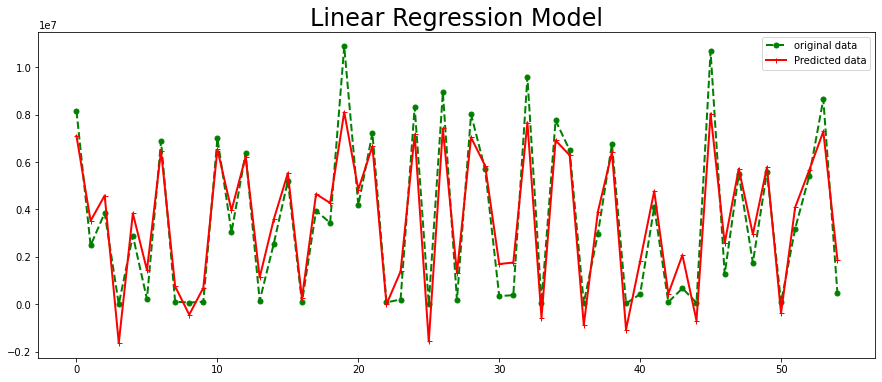

In [ ]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.plot(y_test,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
ax.plot(y_pred,color='red', marker='+', linestyle='solid',linewidth=2, markersize=5)
ax.legend(['original data',"Predicted data"])
ax.set_title("Linear Regression Model",fontdict={"fontsize":24},loc="center")
plt.show()